In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [2]:
#importing the dataset
df=pd.read_csv("C:/Users/HP/OneDrive/Desktop/INTERNSHIP/hypothyroid.csv")

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
#dropping TBG and Referal source features
df=df.drop(['TBG'],axis=1)
df=df.drop(['referral source'],axis=1)

In [5]:
#replacing noise values
df=df.replace(['?'],np.nan)

In [6]:
df.binaryClass.replace({'P':0,'N':1},inplace=True)
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [7]:
from sklearn.impute import KNNImputer
k=KNNImputer(n_neighbors=5)
col=['TSH','T3','TT4','T4U','FTI']
for i in col:
    df[i]=k.fit_transform(df[[i]])

In [8]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                            0
T3 measured                    0
T3                             0
TT4 measured                   0
TT4                            0
T4U measured                   0
T4U                            0
FTI measured                   0
FTI                            0
TBG measured                   0
binaryClass                    0
dtype: int64

In [9]:
df.fillna(method='bfill',inplace=True)

In [10]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [11]:
df['binaryClass'].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

In [12]:
#splitting feature and target sets
x=df.iloc[:,:-1].values
y=df.iloc[:,27].values

In [13]:
x

array([['41', 'F', 'f', ..., 't', 109.0, 'f'],
       ['23', 'F', 'f', ..., 'f', 110.4696486566283, 'f'],
       ['46', 'M', 'f', ..., 't', 120.0, 'f'],
       ...,
       ['74', 'F', 'f', ..., 't', 105.0, 'f'],
       ['72', 'M', 'f', ..., 't', 87.0, 'f'],
       ['64', 'F', 'f', ..., 't', 92.0, 'f']], dtype=object)

In [14]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
l_x=LabelEncoder()
x[:,1]=l_x.fit_transform(x[:,1])
x[:,2]=l_x.fit_transform(x[:,2])
x[:,3]=l_x.fit_transform(x[:,3])
x[:,4]=l_x.fit_transform(x[:,4])
x[:,5]=l_x.fit_transform(x[:,5])
x[:,6]=l_x.fit_transform(x[:,6])
x[:,7]=l_x.fit_transform(x[:,7])
x[:,8]=l_x.fit_transform(x[:,8])
x[:,9]=l_x.fit_transform(x[:,9])
x[:,10]=l_x.fit_transform(x[:,10])
x[:,11]=l_x.fit_transform(x[:,11])
x[:,12]=l_x.fit_transform(x[:,12])
x[:,13]=l_x.fit_transform(x[:,13])
x[:,14]=l_x.fit_transform(x[:,14])
x[:,15]=l_x.fit_transform(x[:,15])
x[:,16]=l_x.fit_transform(x[:,16])
x[:,18]=l_x.fit_transform(x[:,18])
x[:,20]=l_x.fit_transform(x[:,20])
x[:,22]=l_x.fit_transform(x[:,22])
x[:,24]=l_x.fit_transform(x[:,24])
x[:,26]=l_x.fit_transform(x[:,26])

In [16]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [17]:
#creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

### DECISION TREE

In [18]:
from sklearn import tree
dcn=tree.DecisionTreeClassifier()
dcn.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
pred_dcn=dcn.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a=accuracy_score(pred_dcn,y_test)
a

0.9988512349224583

In [20]:
confusion_matrix(y_test,pred_dcn)

array([[866,   1],
       [  1, 873]], dtype=int64)

In [21]:
targets=['1','0']
print(classification_report(y_test,pred_dcn,target_names=targets))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       867
           0       1.00      1.00      1.00       874

    accuracy                           1.00      1741
   macro avg       1.00      1.00      1.00      1741
weighted avg       1.00      1.00      1.00      1741



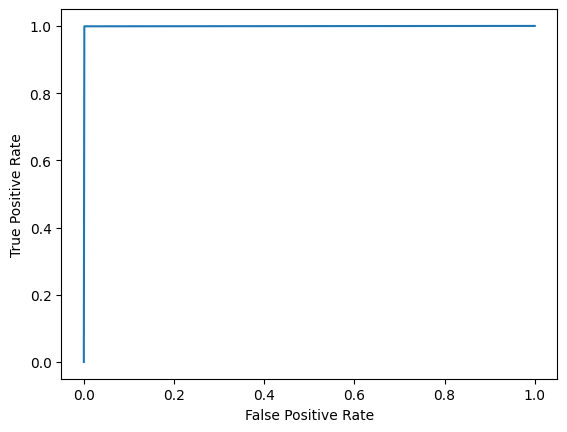

In [22]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
prob=dcn.predict_proba(x_test)
prob=prob[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test,prob)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

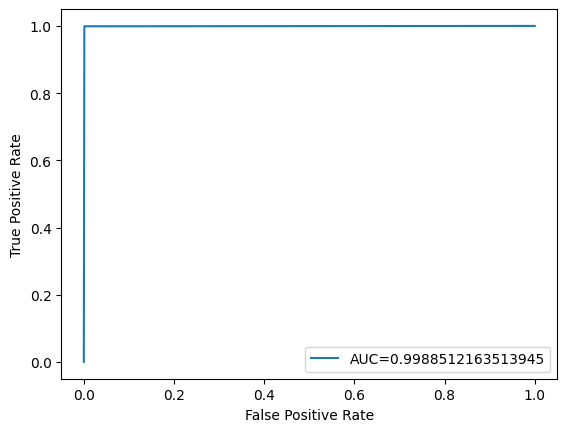

In [23]:
auc = metrics.roc_auc_score(y_test,prob)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

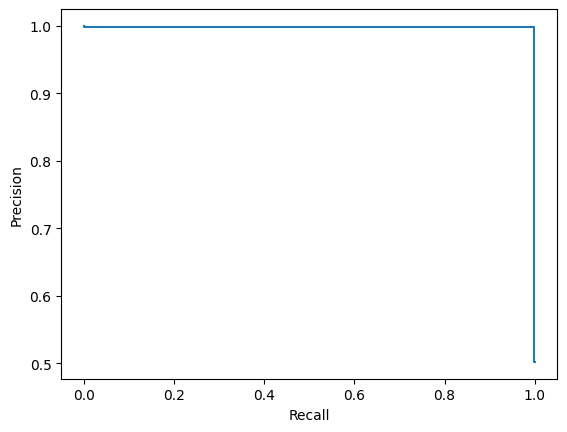

In [24]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
pred_knn=knn.predict(x_test)
score=accuracy_score(pred_knn,y_test)
score

0.9368179207352096

In [27]:
confusion_matrix(y_test,pred_knn)

array([[788,  79],
       [ 31, 843]], dtype=int64)

In [28]:
targets=['1','0']
print(classification_report(y_test,pred_knn,target_names=targets))

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       867
           0       0.91      0.96      0.94       874

    accuracy                           0.94      1741
   macro avg       0.94      0.94      0.94      1741
weighted avg       0.94      0.94      0.94      1741



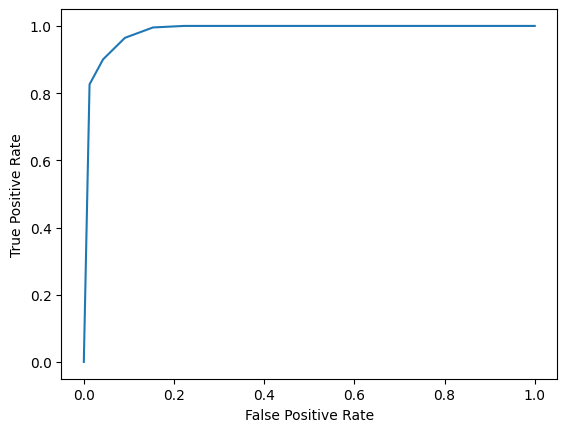

In [29]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
prob_knn=knn.predict_proba(x_test)
prob_knn=prob_knn[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test,prob_knn)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

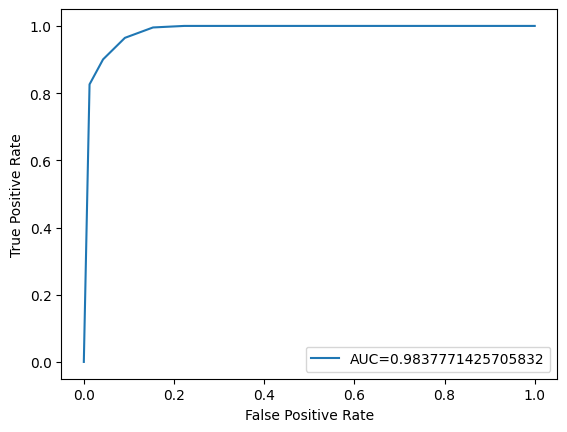

In [30]:
auc = metrics.roc_auc_score(y_test,prob_knn)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

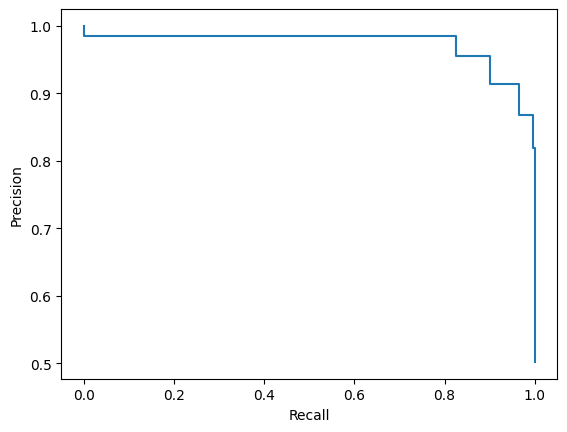

In [31]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, prob_knn)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
pred_lr=lr.predict(x_test)
score=accuracy_score(pred_lr,y_test)
score

0.9707064905226881

In [34]:
confusion_matrix(y_test,pred_lr)

array([[846,  21],
       [ 30, 844]], dtype=int64)

In [35]:
targets=['1','0']
print(classification_report(y_test,pred_lr,target_names=targets))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       867
           0       0.98      0.97      0.97       874

    accuracy                           0.97      1741
   macro avg       0.97      0.97      0.97      1741
weighted avg       0.97      0.97      0.97      1741



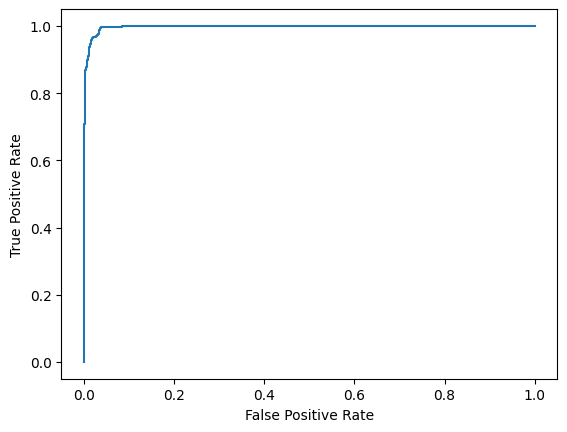

In [36]:
prob_lr=lr.predict_proba(x_test)
prob_lr=prob_lr[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test,prob_lr)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

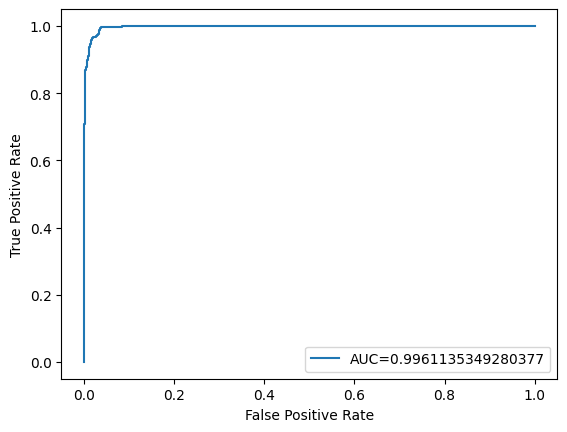

In [37]:
auc = metrics.roc_auc_score(y_test,prob_lr)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

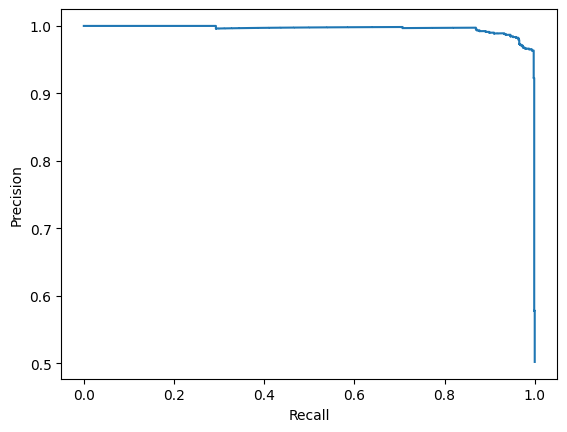

In [38]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, prob_lr)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
pred_rf=rf.predict(x_test)
score=accuracy_score(pred_rf,y_test)
score

0.9994256174612292

In [41]:
confusion_matrix(y_test,pred_rf)

array([[866,   1],
       [  0, 874]], dtype=int64)

In [42]:
targets=['1','0']
print(classification_report(y_test,pred_rf,target_names=targets))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       867
           0       1.00      1.00      1.00       874

    accuracy                           1.00      1741
   macro avg       1.00      1.00      1.00      1741
weighted avg       1.00      1.00      1.00      1741



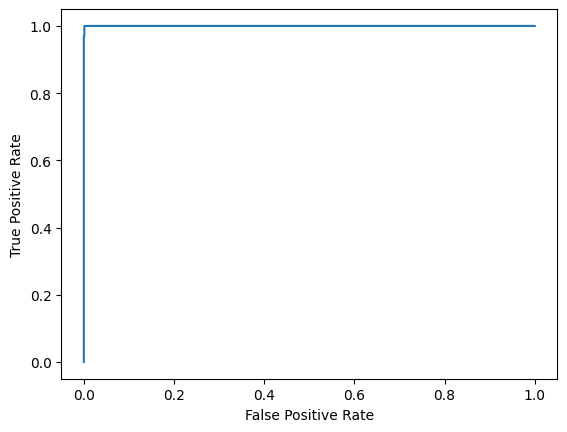

In [43]:
prob_rf=rf.predict_proba(x_test)
prob_rf=prob_rf[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test,prob_rf)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

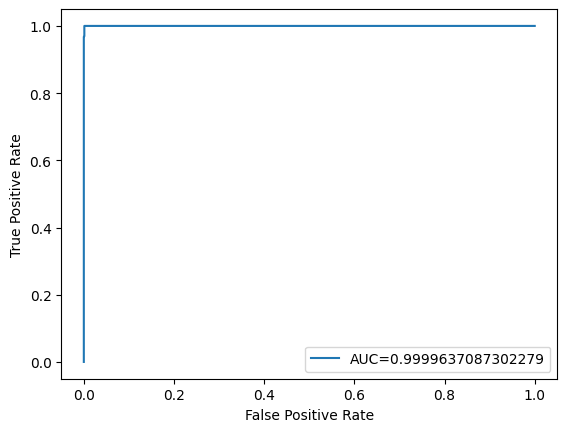

In [44]:
auc = metrics.roc_auc_score(y_test,prob_rf)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

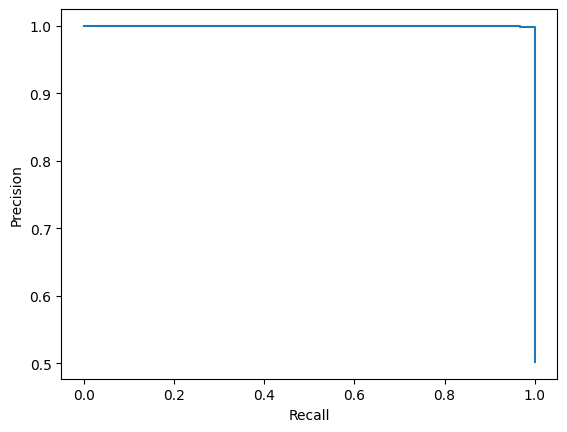

In [45]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, prob_rf)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### NAIVE BAYES

In [46]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)  

GaussianNB()

In [47]:
pred_nb=nb.predict(x_test)
score=accuracy_score(pred_nb,y_test)
score

0.5726593911545089

In [48]:
confusion_matrix(y_test,pred_nb)

array([[141, 726],
       [ 18, 856]], dtype=int64)

In [49]:
targets=['1','0']
print(classification_report(y_test,pred_nb,target_names=targets))

              precision    recall  f1-score   support

           1       0.89      0.16      0.27       867
           0       0.54      0.98      0.70       874

    accuracy                           0.57      1741
   macro avg       0.71      0.57      0.49      1741
weighted avg       0.71      0.57      0.49      1741



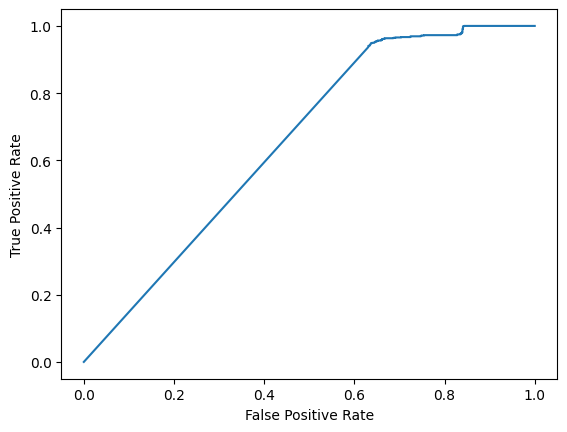

In [50]:
prob_nb=nb.predict_proba(x_test)
prob_nb=prob_nb[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test,prob_nb)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

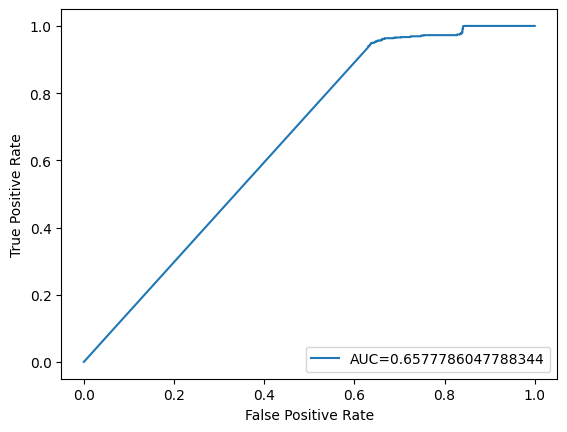

In [51]:
auc = metrics.roc_auc_score(y_test,prob_nb)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

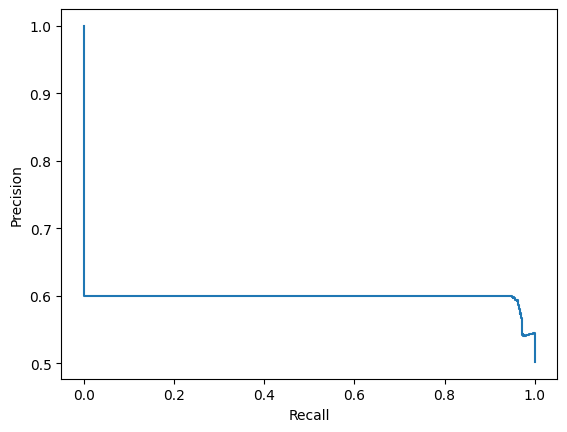

In [52]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, prob_nb)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### SVM

In [53]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.probability = True
svc.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [54]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9833429063756461

In [56]:
confusion_matrix(y_test,y_pred)

array([[845,  22],
       [  7, 867]], dtype=int64)

In [60]:
targets=['0','1']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       867
           1       0.98      0.99      0.98       874

    accuracy                           0.98      1741
   macro avg       0.98      0.98      0.98      1741
weighted avg       0.98      0.98      0.98      1741



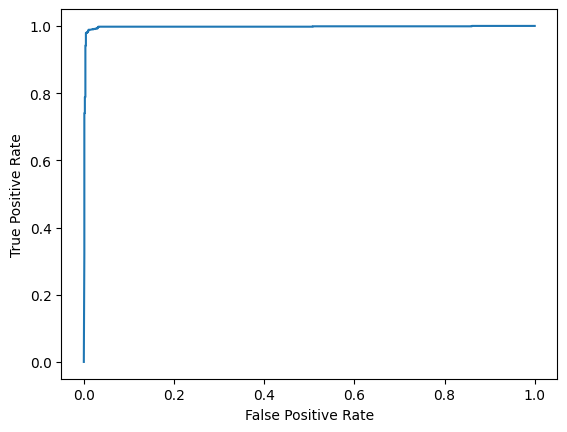

In [61]:
prob=svc.predict_proba(x_test)
prob=prob[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,prob)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

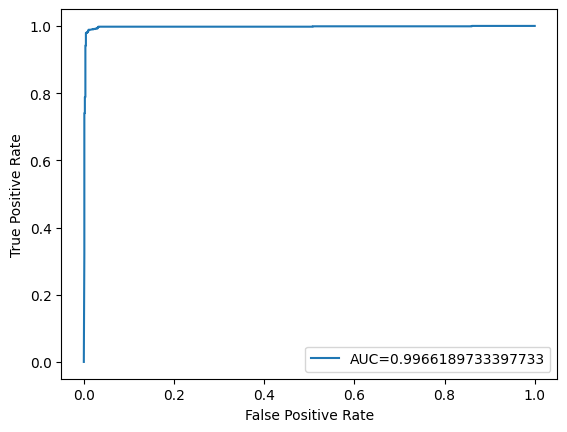

In [62]:
auc = metrics.roc_auc_score(y_test,prob)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

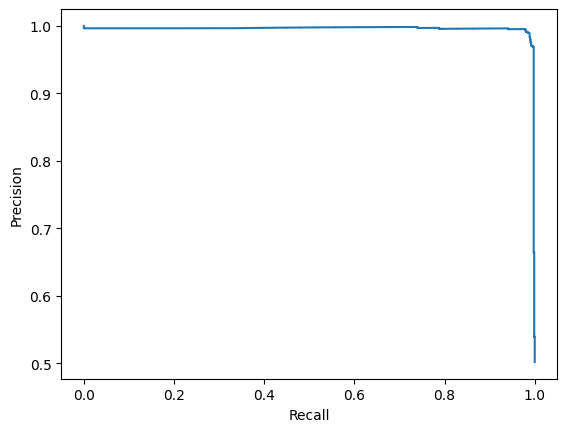

In [63]:
precision, recall, _ = precision_recall_curve(y_test, prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [64]:
sample_size = 10000
standard_norm = np.random.normal(size=sample_size)

In [65]:
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm

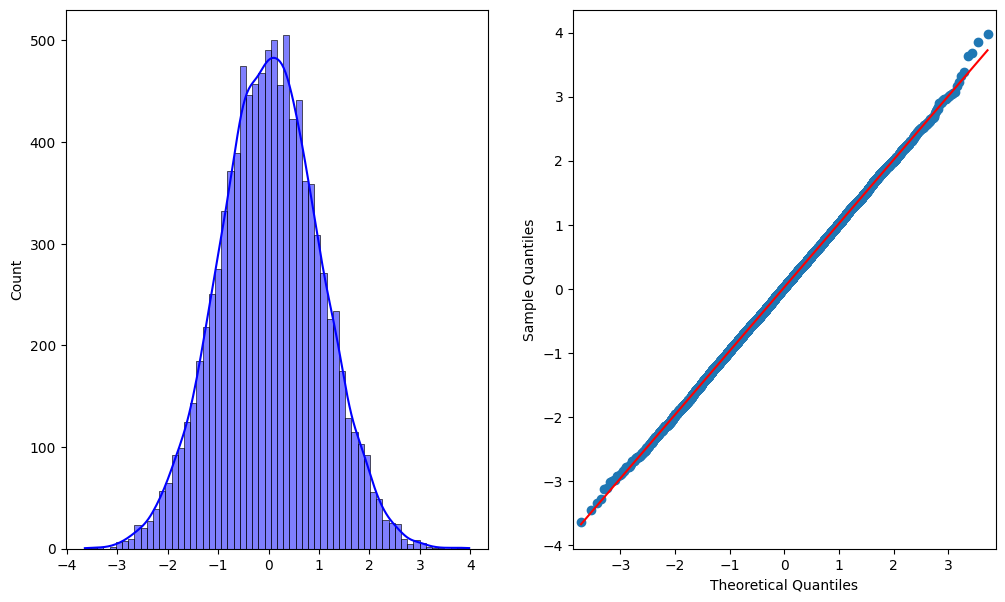

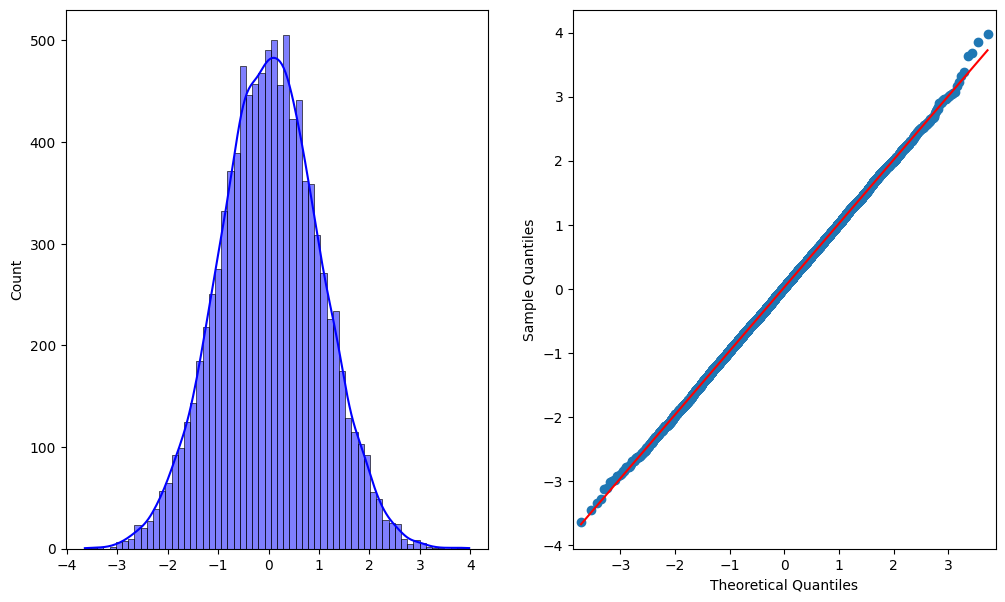

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(standard_norm,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(standard_norm).qqplot(line='s', ax=ax[1])

### Heat map

C:\Users\HP\AppData\Local\Temp\ipykernel_12260\1273710929.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, annot=True)


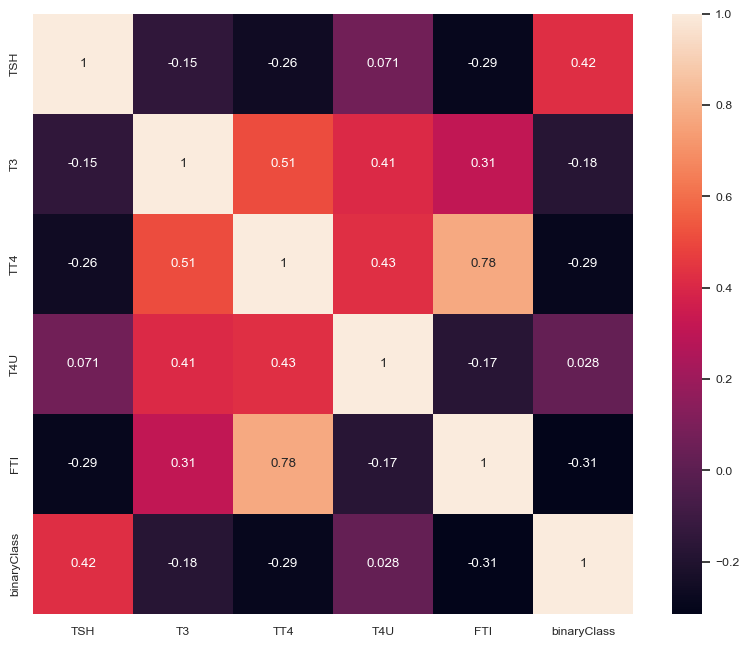

In [67]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.show()

In [68]:
from sklearn.datasets import make_classification
def new_dataset():
    X, Y = make_classification(n_samples=3772, n_features=27, n_informative=11,n_redundant=0,random_state=1)
    return X,Y

In [69]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [70]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr =cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.9833 (0.0077)
>knn 0.9753 (0.0089)
>dt 0.9978 (0.0027)
>svm 0.9736 (0.0082)
>bayes 0.6379 (0.0184)
>rf 0.9981 (0.0025)
>stacking 0.9980 (0.0024)


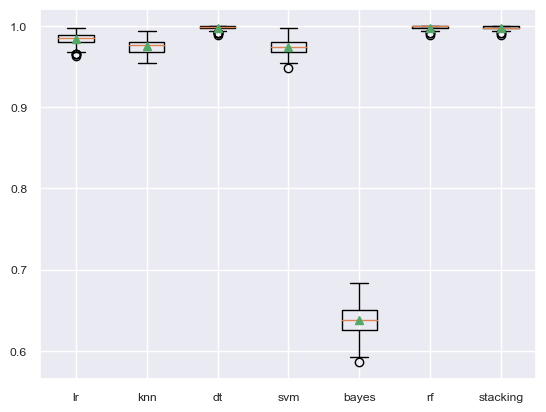

In [72]:
from numpy import mean
from numpy import std
X,Y = new_dataset()
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### ANN

In [73]:
import tensorflow as tf

In [74]:
ann = tf.keras.models.Sequential()

In [75]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [76]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [77]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [78]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [79]:
ann.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
164/164 [==============================] - 1s 1ms/step - loss: 0.7013 - accuracy: 0.6154
Epoch 2/100
164/164 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7393
Epoch 3/100
164/164 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7774
Epoch 4/100
164/164 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8004
Epoch 5/100
164/164 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8117
Epoch 6/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8259
Epoch 7/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8424
Epoch 8/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8506
Epoch 9/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8669
Epoch 10/100
164/164 [==============================] - 0s 1ms/step - loss: 0.3013 - accura

In [80]:
y_pred = ann.predict(x_test)

55/55 [==============================] - 0s 1ms/step


In [81]:
y_pred = (y_pred > 0.5)

In [82]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [83]:
targets=['0','1']
print(classification_report(y_test,y_pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       867
           1       0.99      0.99      0.99       874

    accuracy                           0.99      1741
   macro avg       0.99      0.99      0.99      1741
weighted avg       0.99      0.99      0.99      1741



In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[862,   5],
       [  9, 865]], dtype=int64)

In [85]:
accuracy_score(y_test, y_pred)

0.9919586444572085

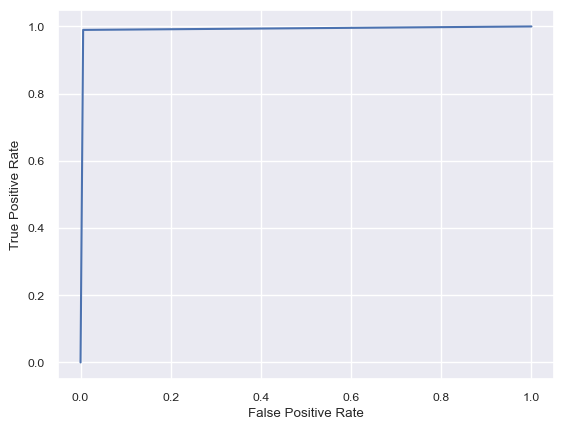

In [86]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

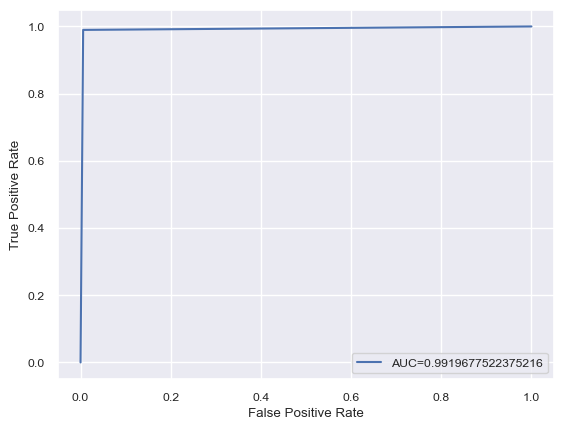

In [87]:
auc = metrics.roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

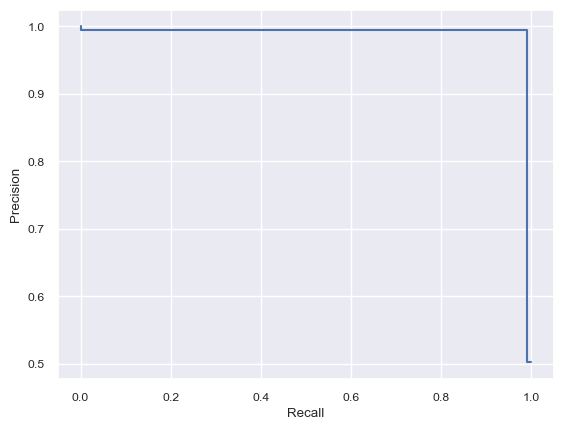

In [88]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()